# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [2]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

**Answer (i)**
Per code block below

In [3]:
# Answer (i) - Creating the alpha function -
# "alpha" as defined below is a derived measure based on the covariance between Sepal Width and Sepal Length
# In other words alpha as defined velow is a normalized measure of the relationship between Sepal Width and Sepal Length

def alpha_func(D, idx):
   cov_ = np.cov(D[['Sepal.Width','Sepal.Length']].loc[idx], rowvar=False)
   return ((cov_[1,1] - cov_[0,1]) /
           (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

Test the code below

In [4]:
alpha_func(df, range(150))

0.7580390244311441

_(ii)_ Construct a new bootstrap data set and recompute alpha

**Answer (ii)**
Per code block below

In [5]:
#Answer (ii)
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(150,
                      150,
                      replace=True))

0.8116994146413992

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

**Answer (iii)**
The mean on Sepal.Length is a single point estimate as it gives us just one value that represents the central tendency of the data. It does not tell us how much this value may vary if we took different samples.
Bootstraping can give the shipping company estimations around the sampling distribution of the mean, its standard error and establish confidence intervals so the company can better manage the risk of underestimating or overestimating the space needed \n\n

**Answer (iv)**
Per code block below

In [6]:
# Answer (iv)

bootstrap_values = []

def boot_SE(D, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = D.shape[0]
    for i in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = alpha_func(D, idx)
        bootstrap_values.append(value)
        
    return np.std(np.array(bootstrap_values))

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

**Answer (v)**
Per code block below

In [7]:
# 
alpha_SE = boot_SE(D=df,
                   B=1000,
                   seed=0)
alpha_SE

0.03180510076860767

_(vi)_ What is the original mean value of `Sepal.Length`?

**Answer (vi)**
5.84333 Per code block below

In [8]:
# Answer (vi)

np.mean(df['Sepal.Length'])

5.843333333333334

Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

**Answer (vii)**
Bootstrapped Mean= 5.8423 and Bosststrappes Std. Dev =  0.0665 Using Seed=0. Per code block below

In [9]:
# Answer (vii)

#defining boot_SE_samples functions to return array of sample means

bootstrap_means = []

def boot_SE_samples(D, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = D.shape[0]
    for i in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = np.mean(D.iloc[idx]['Sepal.Length'])
        bootstrap_means.append(value)
        
    return bootstrap_means


#Passing Values to the bootstrap_SE_samples functions
Samples_Means=  boot_SE_samples(D=df,
                   B=1000,
                   seed=0)

#Obtaining bootstrapped Mean and Std. Deviation
Bootstrapped_Mean=np.mean(np.array(bootstrap_means))
Bootsrapped_std=np.std(np.array(bootstrap_means))


print("Bootstrapped Samples Mean: ",Bootstrapped_Mean)
print("Bootstrapped Samples Std. Deviation: ",Bootsrapped_std)

Bootstrapped Samples Mean:  5.842284666666666
Bootstrapped Samples Std. Deviation:  0.06649295592099295


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

**Answer (viii)**
Confidence interval between 5.7186 and 5.9747 Using Seed=0. Per code block below

In [10]:
lower_bound = np.percentile(Samples_Means, 2.5)
upper_bound = np.percentile(Samples_Means, 97.5)

print("95-percent confidence interval for the mean of iris sepal length: ",lower_bound,upper_bound)

95-percent confidence interval for the mean of iris sepal length:  5.718616666666667 5.974716666666667


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

**Answer (ix)**
Per code block and plot below, the histogram shows a distribution of means close to a bell shape, with most values being very close to the central tendency of 5.842 calculated before and gives us a graphical representation of the spread of values as well.

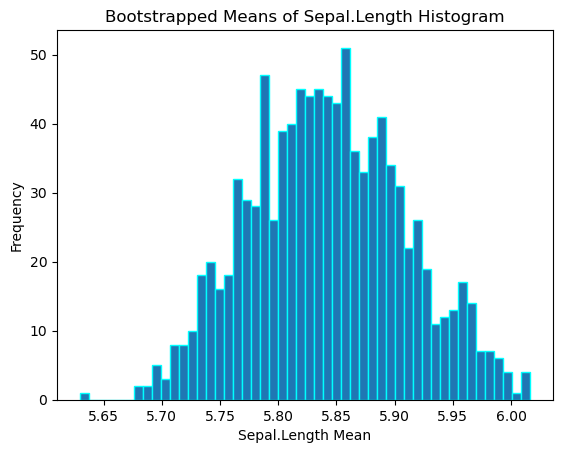

In [11]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(Samples_Means, bins=50, edgecolor='cyan')

# Add a title
ax.set_title('Bootstrapped Means of Sepal.Length Histogram')

# Add a label to the x-axis
ax.set_xlabel('Sepal.Length Mean')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

**Answer (X)**
The company should consider the variability in sepal lengths based on the bootstrap distribution to plan storage space. Using the upper bound of the 95% confidence interval for the mean sepal length in combination with the mean boostrapped alpha value that provides a ratio of width to length of flowers would ensure that the allocated space accounts for potential variability of flowers total dimensions based on length, reducing the risk of underestimating storage needs. The company should also periodically monitor sepal lenght data of flower shipping and adapt its storage space calculations accordingly.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [X] Created a branch with the correct naming convention.
- [X] Ensured that the repository is public.
- [X] Reviewed the PR description guidelines and adhered to them.
- [X] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
